# Risk Analysis in London Public Transport

## Problem Context

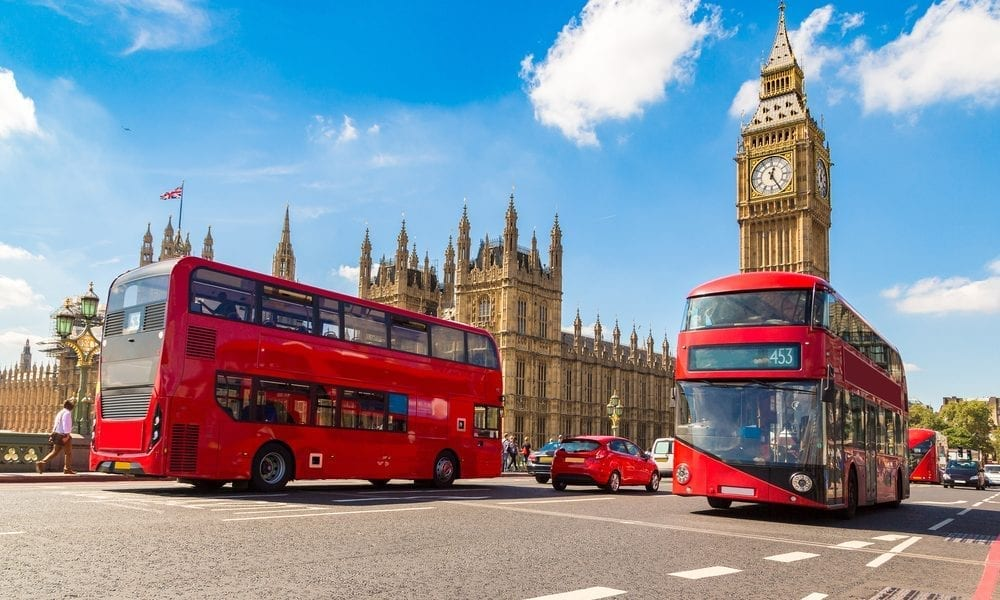

In [64]:
img = cv2.imread('london_public_transport.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

Which traffic incidents are more frequent? Which age group is more involved in traffic incidents? Which type of incident is the most common?

These were some of the questions requested to us as Business Analysts. They will be presented graphically as follows.

The dataset contains a series of observations of **public transport incidents in London between 2015 and 2018**.

**Objectives**
* Explore data
* Answer 10 business questions
* Create a dashboard to present the data

## Importing Libraries

In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import dcc
from dash import html
from jupyter_dash import JupyterDash

## Reading Dataset

In [6]:
dataset = pd.read_excel('TFL Bus Safety.xlsx')

In [7]:
dataset.sample(10)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
21740,2018,2018-07-01,76,London General,Go-Ahead,Northumberland Park,Hackney,Taken to Hospital – Reported Serious Injury or...,Slip Trip Fall,Passenger,Female,Adult
18026,2017,2017-12-01,109,Abellio London,Abellio,Beddington (Abellio London),Lambeth,Injuries treated on scene,Personal Injury,Passenger,Male,Adult
16313,2017,2017-09-01,132,London Central,Go-Ahead,Bexleyheath,Greenwich,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult
17900,2017,2017-12-01,23,Tower Transit,Tower Transit,Westbourne Park,Westminster,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Unknown
18581,2018,2018-01-01,137,Arriva London South,Arriva London,Norwood,Westminster,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult
3734,2015,2015-08-01,W19,Blue Triangle Buses,Go-Ahead,Garage Not Available,Newham,Reported Minor Injury - Treated at Hospital,Collision Incident,Passenger,Unknown,Unknown
6580,2016,2016-10-01,332,Metroline,Metroline,Cricklewood,Brent,Injuries treated on scene,Slip Trip Fall,Passenger,Male,Child
8117,2016,2016-04-01,205,East London,Stagecoach,Garage Not Available,Westminster,Injuries treated on scene,Onboard Injuries,Passenger,Unknown,Child
5100,2015,2015-11-01,343,Abellio London,Abellio,Garage Not Available,Southwark,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Female,Adult
20175,2018,2018-04-01,140,Metroline,Metroline,Harrow Weald,Hillingdon,Injuries treated on scene,Personal Injury,Passenger,Female,Adult


## Analysing Dataset

In [8]:
# Checking the dataset dimension:

dataset.shape

(23158, 12)

Let's identify if the dataset contains duplicated values:

In [9]:
dataset[dataset.duplicated()]

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
11,2015,2015-01-01,11,London General,Go-Ahead,Garage Not Available,Westminster,Injuries treated on scene,Onboard Injuries,Passenger,Female,Adult
28,2015,2015-01-01,22,London General,Go-Ahead,Garage Not Available,Hammersmith & Fulham,Injuries treated on scene,Onboard Injuries,Passenger,Unknown,Unknown
29,2015,2015-01-01,22,London General,Go-Ahead,Garage Not Available,Hammersmith & Fulham,Injuries treated on scene,Onboard Injuries,Passenger,Unknown,Unknown
60,2015,2015-01-01,38,Arriva London North,Arriva London,Garage Not Available,Hackney,Injuries treated on scene,Onboard Injuries,Passenger,Unknown,Unknown
61,2015,2015-01-01,38,Arriva London North,Arriva London,Garage Not Available,Hackney,Injuries treated on scene,Onboard Injuries,Passenger,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
23068,2018,2018-09-01,450,Arriva London South,Arriva London,Norwood,Croydon,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult
23088,2018,2018-09-01,483,Metroline West,Metroline,Alperton,Brent,Taken to Hospital – Reported Serious Injury or...,Slip Trip Fall,Passenger,Female,Adult
23135,2018,2018-09-01,P12,London Central,Go-Ahead,Peckham,Southwark,Injuries treated on scene,Personal Injury,Passenger,Female,Adult
23145,2018,2018-09-01,W4,Arriva London North,Arriva London,Wood Green,Haringey,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult


Once it cointains some **duplicated** information, we'll drop them:

In [10]:
dataset.drop_duplicates(inplace = True)

In [11]:
dataset.shape

(21464, 12)

Checking for the type of data and null values:

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21464 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       21464 non-null  int64         
 1   Date Of Incident           21464 non-null  datetime64[ns]
 2   Route                      21464 non-null  object        
 3   Operator                   21464 non-null  object        
 4   Group Name                 21464 non-null  object        
 5   Bus Garage                 21464 non-null  object        
 6   Borough                    21464 non-null  object        
 7   Injury Result Description  21464 non-null  object        
 8   Incident Event Type        21464 non-null  object        
 9   Victim Category            21464 non-null  object        
 10  Victims Sex                21464 non-null  object        
 11  Victims Age                21464 non-null  object        
dtypes: d

In [13]:
dataset.isna().sum().sum()

0

We don't have any **null** value. We can now follow with the solution of the business problems:

Note: We'll make use of the library **Plotly** in this project that, apart having interesting visualizations, allows us to interact within the graphs.

# 1. What is the number of incidents by Gender?

In [14]:
dataset['Victims Sex'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [15]:
dataset['Victims Sex'].value_counts()

Female     10939
Male        7410
Unknown     3115
Name: Victims Sex, dtype: int64

`Female` victims are the **majority group**.

A **barplot** can help us to describe these data:

In [16]:
gender_incidents = dataset.groupby(by = 'Victims Sex').count().iloc[:, 7]

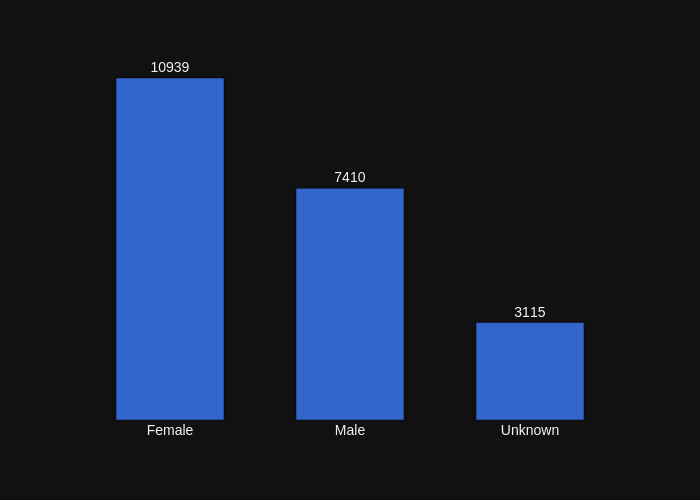

In [17]:
fig1 = px.bar(x = gender_incidents.index, y = gender_incidents, text_auto = '.f')

fig1.update_traces(marker_color='#3366CC', marker_line_color='black')
fig1.update_traces(textfont_size=14, textposition="outside", cliponaxis=False)
fig1.update_yaxes(showticklabels=False, visible = False)
fig1.update_xaxes(title = '', tickfont=dict(size=14))
fig1.update_layout(template = 'plotly_dark')
fig1.update_traces(width=.6)

fig1.show('png')

# 2. Which Age Group was more involved in incidents?

In [18]:
dataset['Victims Age'].unique()

array(['Child', 'Unknown', 'Elderly', 'Adult', 'Youth'], dtype=object)

In [19]:
dataset['Victims Age'].value_counts()

Adult      9968
Unknown    6423
Elderly    2684
Child      2082
Youth       307
Name: Victims Age, dtype: int64

`Adults` were more **involved in incidents** during the period of observation.

A **pie chart** with two categorical groups is useful to see these data (let's accumulate the other categories in a 'Others' group):

In [20]:
age_group = dataset['Victims Age'].value_counts()

In [21]:
adult_group = age_group[0]
others = 0

for group in age_group[1:]:
    
    others += group

age_group = {'Adult': adult_group, 'Others': others}

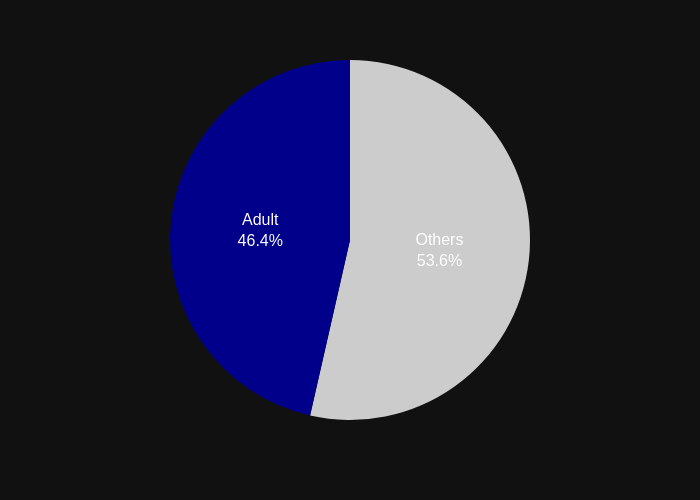

In [22]:
fig2 = px.pie(age_group.keys(), values = age_group.values(), names = age_group.keys(), 
             color = age_group.keys(), 
             color_discrete_map={'Adult':'darkblue',
                                 'Others':'rgb(204, 204, 204)'})

fig2.update_traces(textposition='inside', textinfo='percent+label', textfont = {'color':'white'})
fig2.update_layout(font = dict(size = 16, color = 'white'))
fig2.update_layout(template = 'plotly_dark')
fig2.update_layout(showlegend=False)

fig2.show('png')

# 3. What is the percentage of incidents by Event Type?

In [23]:
dataset['Incident Event Type'].unique()

array(['Onboard Injuries', 'Collision Incident', 'Assault',
       'Vandalism Hooliganism', 'Safety Critical Failure',
       'Personal Injury', 'Slip Trip Fall', 'Activity Incident Event',
       'Fire', 'Robbery'], dtype=object)

In [24]:
round(dataset['Incident Event Type'].value_counts(normalize = True)*100, 2)

Slip Trip Fall             30.55
Onboard Injuries           27.59
Personal Injury            20.23
Collision Incident         17.78
Assault                     2.67
Activity Incident Event     0.52
Vandalism Hooliganism       0.33
Safety Critical Failure     0.28
Fire                        0.02
Robbery                     0.01
Name: Incident Event Type, dtype: float64

We can observe that `Slip Trip Fall` is the **main type** of incident in the dataset while `Robbery` is the **least frequent**.

A **horizontal bar plot** is suitable to visualize these type of data:

In [25]:
event_type = round(dataset['Incident Event Type'].value_counts(normalize = True)*100, 2).sort_values()

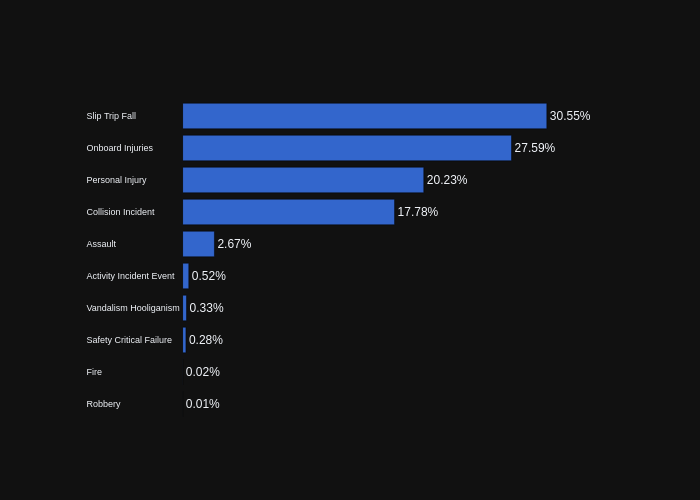

In [60]:
fig3 = go.Figure(go.Bar(
    x=event_type.values,
    y= event_type.index,
    yaxis='y2',
    orientation='h',
    text=[f'{i}%' for i in event_type.values]
    ))

fig3.update_traces(marker_color='#3366CC', marker_line_color='black')
fig3.update_traces(textfont_size=12, textposition="outside", cliponaxis=False)
fig3.update_layout(xaxis=dict(domain=[0.19, 0.9]),
                  yaxis2=dict(anchor='free', position=0.01,
                             side='right'))
fig3.update_xaxes(showticklabels=False, visible = False)
fig3.update_yaxes(tickfont=dict(size=9))
fig3.update_layout(template = 'plotly_dark')

fig3.show('png')

# 4. How is the evolution of monthly incidents over Time?

In [27]:
monthly_incidents = pd.DataFrame()

for year in dataset.Year.unique():
    
    temp = dataset[dataset.Year == year]['Date Of Incident'].value_counts()
    
    temp = temp.to_frame()
    
    temp.reset_index(inplace = True)
    
    temp.sort_values(by = 'index', inplace = True)
    
    temp.rename(columns = {'Date Of Incident': 'Incidents'}, inplace = True)
    
    monthly_incidents = pd.concat([monthly_incidents, temp], axis = 0)
    
    monthly_incidents.reset_index(inplace = True, drop = True)
    
monthly_incidents.rename(columns = {'index': 'Period'}, inplace = True)

monthly_incidents.head()

,Period,Incidents
0,2015-01-01,357
1,2015-02-01,341
2,2015-03-01,410
3,2015-04-01,432
4,2015-05-01,419


In this case, a **line plot** is more adequate to understand the `monthly evolution of incidents over time`:

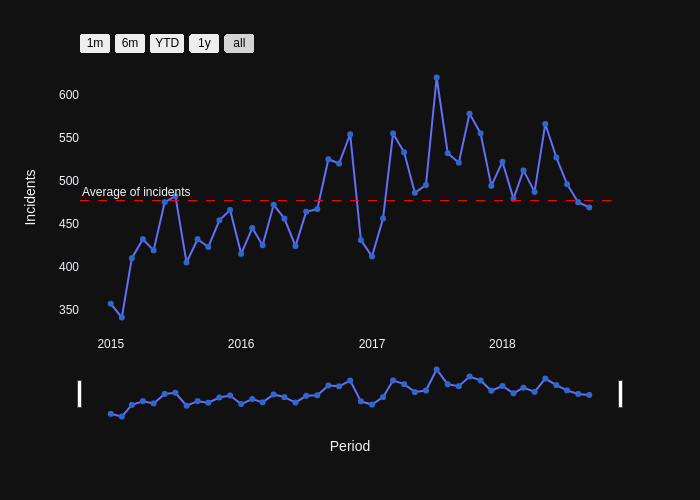

In [28]:
fig4 = px.line(monthly_incidents, x='Period', y='Incidents', 
               markers=True)

fig4.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig4.add_hline(y=monthly_incidents.Incidents.mean(), line_width=1, line_dash="dash", line_color="red",
              annotation_text="Average of incidents", annotation_position="top left")
fig4.update_traces(marker_color='#3366CC', marker_line_color='black')
fig4.update_layout(template = 'plotly_dark')
fig4.update_layout(xaxis = {'showgrid': False}, yaxis = {'showgrid': False})
fig4.update_layout(xaxis=dict(rangeselector = dict(font = dict( color = "black"))))

fig4.show('png')

# 5. When the incident event type was 'Collision Incident', in which month was there the biggest number of incidents with female victims?

In [29]:
collision_incident = dataset[(dataset['Incident Event Type'] == 'Collision Incident') & (dataset['Victims Sex'] == 'Female')]

In [30]:
collision_incident

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
47,2015,2015-01-01,31,Tower Transit,Tower Transit,Garage Not Available,Brent,Taken to Hospital – Reported Serious Injury or...,Collision Incident,Pedestrian,Female,Elderly
106,2015,2015-01-01,79,Metroline,Metroline,Garage Not Available,Brent,Taken to Hospital – Reported Serious Injury or...,Collision Incident,Passenger,Female,Adult
116,2015,2015-01-01,93,London General,Go-Ahead,Garage Not Available,Merton,Taken to Hospital – Reported Serious Injury or...,Collision Incident,Pedestrian,Female,Elderly
128,2015,2015-01-01,104,Selkent,Stagecoach,Garage Not Available,Newham,Taken to Hospital – Reported Serious Injury or...,Collision Incident,Pedestrian,Female,Unknown
141,2015,2015-01-01,118,London General,Go-Ahead,Garage Not Available,Merton,Injuries treated on scene,Collision Incident,Passenger,Female,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
23086,2018,2018-09-01,483,Metroline West,Metroline,Alperton,Brent,Reported Minor Injury - Treated at Hospital,Collision Incident,Pedestrian,Female,Adult
23115,2018,2018-09-01,EL1,Blue Triangle Buses,Go-Ahead,River Road,None London Borough,Taken to Hospital – Reported Serious Injury or...,Collision Incident,Passenger,Female,Adult
23121,2018,2018-09-01,H25,Abellio London,Abellio,Twickenham (Abellio London W),Hounslow,Reported Minor Injury - Treated at Hospital,Collision Incident,Pedestrian,Female,Child
23123,2018,2018-09-01,H37,London United,London United,Hounslow,Richmond Upon Thames,Injuries treated on scene,Collision Incident,Passenger,Female,Adult


In [31]:
collision_incident['Date Of Incident'].value_counts().index[0].strftime('%B/%Y')

'November/2016'

We can see that the on `November/2016` there was the biggest number of **collision incidents** among **female victims**.

A **histogram** can help us to better understand these data:

In [32]:
collision_grouped = collision_incident.groupby(by = 'Date Of Incident')['Year'].count()

collision_index = collision_grouped.index[collision_grouped == collision_grouped.max()]

index_number = 0

for index in collision_grouped.index:
    
    if index != collision_index:
        
        index_number += 1
        
    else:
        
        break

color_discrete_sequence = ['#3366CC'] * collision_incident['Date Of Incident'].value_counts().count()
color_discrete_sequence[index_number] = 'red'

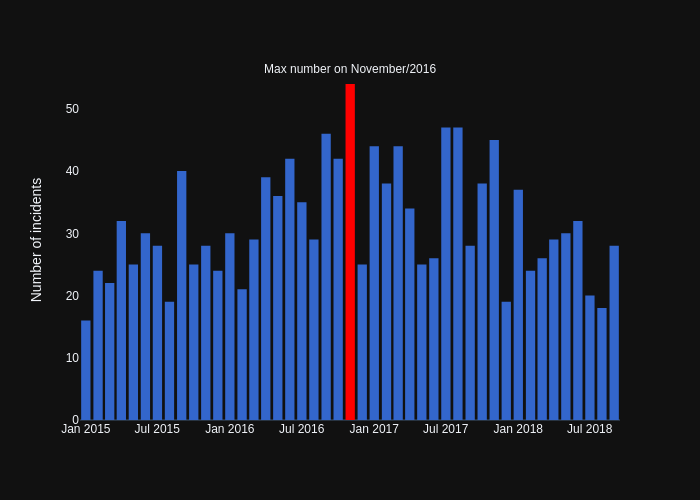

In [33]:
fig5 = px.histogram(collision_incident, x='Date Of Incident',
                   nbins = 50,)

fig5.update_layout(bargap=0.2)
fig5.update_traces(marker_color=color_discrete_sequence, marker_line_color='black')
fig5.update_layout(template = 'plotly_dark')
fig5.update_xaxes(title = '', tickfont=dict(size=12))
fig5.update_yaxes(title = 'Number of incidents', tickfont=dict(size=12))
fig5.add_annotation(x= collision_index[0], y=collision_grouped.max(),
            text= f"Max number on {collision_index[0].strftime('%B/%Y')}",
            showarrow=False,
            yshift = 15)
fig5.update_layout(xaxis = {'showgrid': False}, yaxis = {'showgrid': False})

fig5.show('png')

# 6. What was the average of incidents by month with Child victims?

In [34]:
child_victims = dataset[dataset['Victims Age'] == 'Child']
child_victims

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
13,2015,2015-01-01,12,London Central,Go-Ahead,Garage Not Available,Southwark,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Passenger,Male,Child
22,2015,2015-01-01,18,Metroline West,Metroline,Garage Not Available,Brent,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Passenger,Unknown,Child
52,2015,2015-01-01,33,London United,London United,Garage Not Available,Richmond Upon Thames,Injuries treated on scene,Onboard Injuries,Passenger,Unknown,Child
55,2015,2015-01-01,34,Metroline,Metroline,Garage Not Available,Waltham Forest,Injuries treated on scene,Onboard Injuries,Passenger,Unknown,Child
...,...,...,...,...,...,...,...,...,...,...,...,...
23119,2018,2018-09-01,H17,London United,London United,Park Royal,Harrow,Reported Minor Injury - Treated at Hospital,Slip Trip Fall,Passenger,Male,Child
23120,2018,2018-09-01,H25,Abellio London,Abellio,Twickenham (Abellio London W),Hounslow,Injuries treated on scene,Slip Trip Fall,Passenger,Male,Child
23121,2018,2018-09-01,H25,Abellio London,Abellio,Twickenham (Abellio London W),Hounslow,Reported Minor Injury - Treated at Hospital,Collision Incident,Pedestrian,Female,Child
23122,2018,2018-09-01,H32,London United,London United,Hounslow,Hounslow,Injuries treated on scene,Slip Trip Fall,Passenger,Male,Child


In [35]:
avg_month = child_victims.groupby(by = 'Date Of Incident').count().iloc[:,0].sum() / \
            child_victims.groupby(by = 'Date Of Incident').count().iloc[:,0].count()

In [36]:
print(round(avg_month, 2))

46.27


There was an `average` of **46.27** incidents by month with **child victims**.

Once again, a **histogram** along with a horizontal line will be useful to see these data:

In [37]:
avg_child = child_victims.groupby(by = 'Date Of Incident')['Year'].count()

In [38]:
avg_child.index = avg_child.index.strftime('%b/%Y')

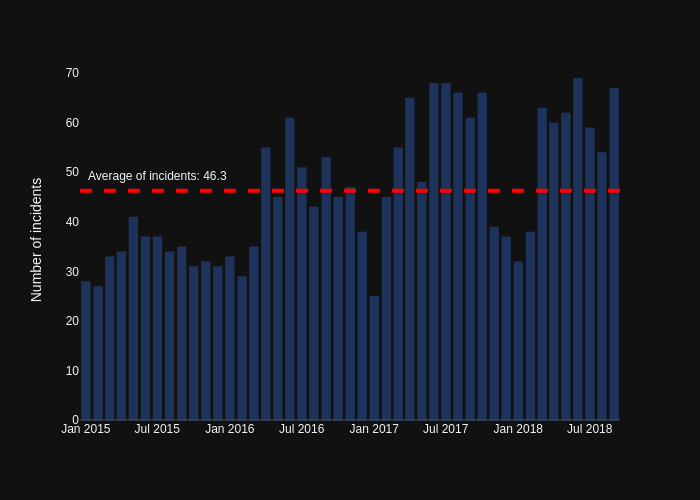

In [39]:
fig6 = px.histogram(child_victims, x='Date Of Incident', nbins = 50, 
                   opacity = 0.40)

fig6.update_layout(bargap=0.2)
fig6.update_layout(template = 'plotly_dark')
fig6.update_xaxes(title = '', tickfont=dict(size=12))
fig6.update_yaxes(title = 'Number of incidents', tickfont=dict(size=12))
fig6.add_hline(y=avg_child.mean(), line_width=4, line_dash="dash", line_color="red")
fig6.add_annotation(x= '2015-07-01', y=avg_child.mean(),
            text= f"Average of incidents: {round(avg_child.mean(), 1)}",
            showarrow=False,
            yshift = 15)
fig6.update_traces(marker_color= '#3366CC', marker_line_color='black')
fig6.update_layout(xaxis = {'showgrid': False}, yaxis = {'showgrid': False})

fig6.show('png')

# 7. Considering the injury result description as 'Injuries treated on scene', what is the total number of incidents of male and female victims?

In [40]:
treated_onscene = dataset[dataset['Injury Result Description'] == 'Injuries treated on scene']
treated_onscene = treated_onscene[(treated_onscene['Victims Sex'] == 'Female') | (treated_onscene['Victims Sex'] == 'Male')]
treated_onscene

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
6,2015,2015-01-01,8,Selkent,Stagecoach,Garage Not Available,City of London,Injuries treated on scene,Onboard Injuries,Passenger,Male,Adult
8,2015,2015-01-01,10,London United,London United,Garage Not Available,Westminster,Injuries treated on scene,Onboard Injuries,Passenger,Female,Elderly
10,2015,2015-01-01,11,London General,Go-Ahead,Garage Not Available,Westminster,Injuries treated on scene,Onboard Injuries,Passenger,Female,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
23149,2018,2018-09-01,E10,London United,London United,Hounslow Heath,Ealing,Injuries treated on scene,Slip Trip Fall,Passenger,Male,Child
23153,2018,2018-09-01,(blank),East London,Stagecoach,West Ham,Newham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23154,2018,2018-09-01,(blank),London United,London United,Hounslow,Not specified,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23155,2018,2018-09-01,(blank),London United,London United,Park Royal,Harrow,Injuries treated on scene,Slip Trip Fall,Operational Staff,Male,Adult


In [41]:
injuries_male = treated_onscene[treated_onscene['Victims Sex'] == 'Male'].shape[0]
print(injuries_male)

5389


In [42]:
injuries_female = treated_onscene[treated_onscene['Victims Sex'] == 'Female'].shape[0]
print(injuries_female)

8070


Considering the `Injuries treated on scene`, there was **5.389** cases among **males** and **8.070** cases among **females** victims.

A **vertical bar plot** is suitable to observe these data:

In [43]:
total_injuries = pd.DataFrame(data = [{'Injuries': injuries_male, 'Gender': 'Male'}, 
                                {'Injuries': injuries_female, 'Gender': 'Female'}])
total_injuries['aux'] = 0

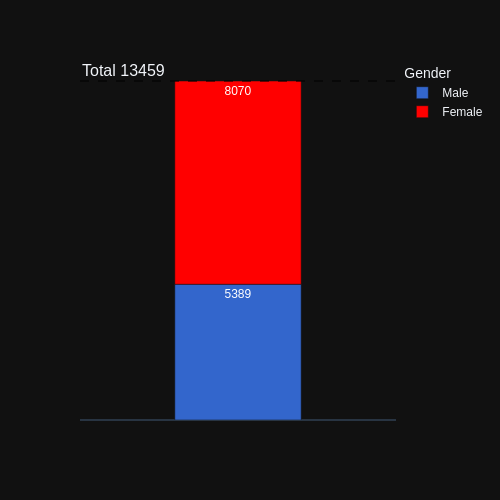

In [44]:
fig7 = px.bar(total_injuries, x = 'aux', y="Injuries",  color="Gender", text_auto=True, width = 500, height = 500,
            color_discrete_map = {'Male': '#3366CC', 'Female': 'red'})

fig7.update_xaxes(showticklabels=False, title=None)
fig7.update_yaxes(showticklabels=False, title=None)
fig7.update_traces(width=.4)
fig7.add_hline(y= total_injuries.Injuries.sum(), line_width=1, line_dash="dash", line_color="black",
              annotation=dict(font_size=16, font_family="Arial"),
              annotation_text=f"Total {total_injuries.Injuries.sum()}", annotation_position="top left")
fig7.update_layout(template = 'plotly_dark')
fig7.update_layout(xaxis = {'showgrid': False}, yaxis = {'showgrid': False})

fig7.show('png')

# 8. In which month of 2017 was there the highest number of incidents with Elderly victims?

In [45]:
elderly_victims = dataset[(dataset['Victims Age'] == 'Elderly') & (dataset['Year'] == 2017)]
elderly_victims

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
11827,2017,2017-01-01,18,Metroline West,Metroline,Willesden Junction,Brent,Taken to Hospital – Reported Serious Injury or...,Slip Trip Fall,Passenger,Female,Elderly
11829,2017,2017-01-01,18,Metroline West,Metroline,Willesden Junction,Westminster,Injuries treated on scene,Personal Injury,Passenger,Female,Elderly
11835,2017,2017-01-01,23,Tower Transit,Tower Transit,Westbourne Park,Kensington & Chelsea,Reported Minor Injury - Treated at Hospital,Collision Incident,Pedestrian,Female,Elderly
11844,2017,2017-01-01,28,Tower Transit,Tower Transit,Atlas Road,Wandsworth,Reported Minor Injury - Treated at Hospital,Slip Trip Fall,Passenger,Female,Elderly
11845,2017,2017-01-01,29,Arriva London North,Arriva London,Wood Green,Camden,Injuries treated on scene,Personal Injury,Passenger,Male,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...
18332,2017,2017-12-01,H37,London United,London United,Hounslow,Richmond Upon Thames,Taken to Hospital – Reported Serious Injury or...,Slip Trip Fall,Passenger,Male,Elderly
18359,2017,2017-12-01,R3,Metrobus,Go-Ahead,Orpington (Metrobus),Bromley,Injuries treated on scene,Personal Injury,Passenger,Female,Elderly
18372,2017,2017-12-01,W3,Arriva London North,Arriva London,Wood Green,Haringey,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Elderly
18373,2017,2017-12-01,W8,Metroline,Metroline,Potters Bar,Enfield,Injuries treated on scene,Personal Injury,Passenger,Female,Elderly


In [46]:
elderly_victims['Date Of Incident'].value_counts().index[0].strftime('%B')

'July'

`July` was the month in **2017** where there was the highest number of incidents with **Elderly victims**.

A **line plot** can highlight this period:

In [47]:
incidents_elderly = elderly_victims['Date Of Incident'].value_counts().sort_index()

In [48]:
index_max = incidents_elderly.index[incidents_elderly == incidents_elderly.max()]

index_number = 0

for index in incidents_elderly.index:
    
    if index != index_max:
        
        index_number += 1
        
    else:
        
        break

color_discrete_sequence = ['#3366CC'] * incidents_elderly.count()
color_discrete_sequence[index_number] = 'red'

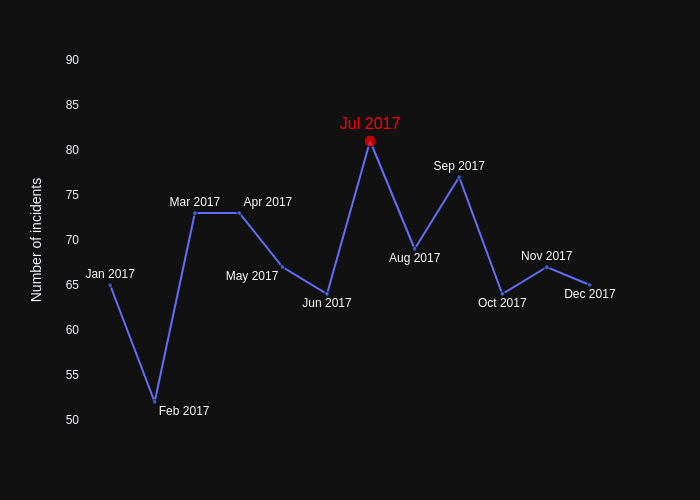

In [49]:
fig8 = px.line(incidents_elderly, y=incidents_elderly.values, 
              text = incidents_elderly.index.strftime('%b %Y'))

fig8.update_traces(textposition = ['top center', 'bottom right', 'top center', 'top right', 'bottom left', 'bottom center',
                                  'top center', 'bottom center', 'top center', 'bottom center', 'top center', 'bottom center'])
fig8.update_traces(marker_color=color_discrete_sequence, marker_line_color='black', 
                  textfont_color = ['red' if i == index_max else 'white' for i in incidents_elderly.index],
                  textfont_size = [16 if i == index_max else 12 for i in incidents_elderly.index],
                  marker_size = [12 if i == index_max else 5 for i in incidents_elderly.index])
fig8.update_layout(template = 'plotly_dark')
fig8.update_xaxes(showticklabels=False, visible = False)
fig8.update_yaxes(title = 'Number of incidents', tickfont=dict(size=12))
fig8.update_layout(yaxis_range=[50,90])
fig8.update_layout(xaxis = {'showgrid': False}, yaxis = {'showgrid': False})

fig8.show('png')

# 9. Considering the 'Operator', what is the distribution of incidents over time?

In [50]:
operator = dataset.groupby(by='Operator')['Date Of Incident'].value_counts()
operator = operator.to_frame()
operator.rename(columns = {'Date Of Incident': 'Number of Incidents'}, inplace = True)
operator = operator.sort_index()
operator = operator.reset_index(level=[0, 1])

In [51]:
operator

,Operator,Date Of Incident,Number of Incidents
0,Abellio London,2015-01-01,10
1,Abellio London,2015-02-01,6
2,Abellio London,2015-03-01,7
3,Abellio London,2015-04-01,9
4,Abellio London,2015-05-01,11
...,...,...,...
831,Tower Transit,2018-06-01,18
832,Tower Transit,2018-07-01,11
833,Tower Transit,2018-08-01,11
834,Tower Transit,2018-09-01,14


In order to visualize the `distribution of incidents over time by Operator`, we'll make use of **line plot** with animation frames: 

In [52]:
mask =  operator.Operator.value_counts() > 3

list_filter = []

for index, value in zip(mask.index, mask.values):
    
    if value:
        
        list_filter.append(index)

In [53]:
operator = operator[operator.Operator.isin(list_filter)]

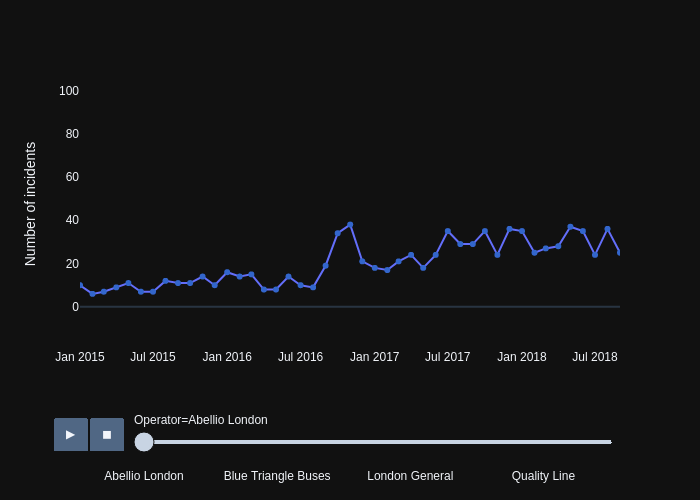

In [54]:
fig9 = px.line(operator, x="Date Of Incident", y="Number of Incidents", animation_frame="Operator", 
           range_x=[operator['Date Of Incident'].min(), operator['Date Of Incident'].max()], 
                 range_y=[-19, operator['Number of Incidents'].max()], #title='Distribution of incidents over time by operator',
                 markers = True,)

fig9.update_layout(template = 'plotly_dark')
fig9.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000
fig9.update_xaxes(title = '')
fig9.update_yaxes(title = 'Number of incidents', tickfont=dict(size=12))
fig9.update_traces(marker_color='#3366CC', marker_line_color='black')
fig9.update_layout(xaxis = {'showgrid': False}, yaxis = {'showgrid': False})

fig9.show('png')

# 10. What is the 'Incident Event Type' most common between 'Cyclist'?

In [55]:
cyclists = dataset[dataset['Victim Category'] == 'Cyclist']
cyclists

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
57,2015,2015-01-01,37,Metrobus,Go-Ahead,Garage Not Available,Wandsworth,Injuries treated on scene,Collision Incident,Cyclist,Male,Adult
74,2015,2015-01-01,52,Metroline,Metroline,Garage Not Available,Brent,Taken to Hospital – Reported Serious Injury or...,Collision Incident,Cyclist,Male,Adult
131,2015,2015-01-01,109,Arriva London South,Arriva London,Garage Not Available,Lambeth,Injuries treated on scene,Collision Incident,Cyclist,Unknown,Unknown
195,2015,2015-01-01,181,Metrobus,Go-Ahead,Garage Not Available,Lewisham,Injuries treated on scene,Collision Incident,Cyclist,Male,Adult
234,2015,2015-01-01,242,Arriva London North,Arriva London,Garage Not Available,Hackney,Injuries treated on scene,Collision Incident,Cyclist,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
22861,2018,2018-09-01,155,London General,Go-Ahead,Stockwell,Lambeth,Taken to Hospital – Reported Serious Injury or...,Collision Incident,Cyclist,Female,Adult
22873,2018,2018-09-01,166,Arriva London South,Arriva London,Croydon (Arriva),Not specified,Taken to Hospital – Reported Serious Injury or...,Collision Incident,Cyclist,Male,Elderly
22940,2018,2018-09-01,242,Arriva London North,Arriva London,Clapton,Hackney,Taken to Hospital – Reported Serious Injury or...,Collision Incident,Cyclist,Female,Unknown
23023,2018,2018-09-01,337,London General,Go-Ahead,Putney,Richmond Upon Thames,Taken to Hospital – Reported Serious Injury or...,Collision Incident,Cyclist,Male,Adult


In [56]:
cyclists['Incident Event Type'].value_counts()

Collision Incident    250
Personal Injury         8
Slip Trip Fall          7
Onboard Injuries        4
Name: Incident Event Type, dtype: int64

`Collision` is the most common incident with **Cyclists** victims.

A **pie chart** allows us to better visualize these data (we summed up all the other categories inside a 'Others' group):

In [57]:
incidents_cyclists = cyclists['Incident Event Type'].value_counts()

In [58]:
collision_incident = incidents_cyclists[0]
others = 0

for event in incidents_cyclists[1:]:
    
    others += event

incidents_cyclists = {'Collision Incident': collision_incident, 'Others': others}

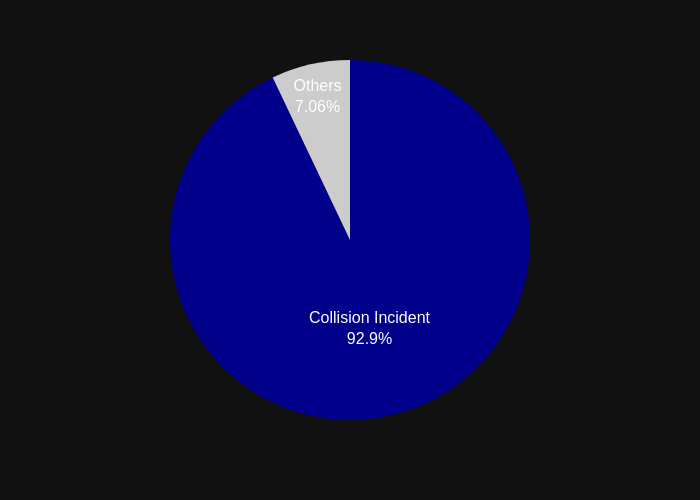

In [59]:
fig10 = px.pie(incidents_cyclists.keys(), values = incidents_cyclists.values(), names = incidents_cyclists.keys(),  
             color = incidents_cyclists.keys(), #title = 'Most common incident event type among cyclists',
             color_discrete_map={'Collision Incident':'darkblue',
                                 'Others':'rgb(204, 204, 204)'})

fig10.update_traces(textposition='inside', textinfo='percent+label', textfont = {'color':'white'})
fig10.update_layout(font = dict(size = 16, color = 'black'))
fig10.update_layout(showlegend=False)
fig10.update_layout(template = 'plotly_dark')

fig10.show('png')

We can now create a **Dashboard** to summarize all the knowledge acquired in this project and to answer all the business problems. We can use the framework **Dash** for this purpose. A local version is shown below and a deployed version can be accessed by the link on the main page.

In [ ]:
app = JupyterDash(__name__)

app.layout = html.Div(style={'backgroundColor': 'black'}, 
                      children=[
    html.H1('Risk Analysis in Public Transport', style={'font-size': '38px', 'textAlign': 'center', 'color': 'white'}),
                          
    html.Div([
        html.Div([
            html.H3('What is the percentage of incidents by Event Type?', 
                    style={'font-size': '20px', 'font-weight': 'normal', 'color': 'white'}),
            dcc.Graph(figure=fig3)
        ], style={'width': '65%', 'display': 'inline-block'}),
        html.Div([
            html.H3('Which Age Group was more envolved in incidents?', 
                    style={'font-size': '20px', 'font-weight': 'normal', 'color': 'white'}),
            dcc.Graph(figure=fig2)
        ], style={'width': '35%', 'display': 'inline-block'}),
    ], className='plot-row'),   
                                                  
    html.Div([
        html.Div([
            html.H3('How is the evolution of monthly incidents over time?', 
                    style={'font-size': '20px', 'font-weight': 'normal', 'color': 'white'}),
            dcc.Graph(figure=fig4)
        ], style={'width': '60%', 'display': 'inline-block'}),
        html.Div([
            html.H3('What is the number of incidents by Gender?', 
                    style={'font-size': '20px', 'font-weight': 'normal', 'color': 'white'}),
            dcc.Graph(figure=fig1)
        ], style={'width': '40%', 'display': 'inline-block'}),
       
    ], className='plot-row'),                       
                                                   
    html.Div([
        html.Div([
            html.H3("When the incident type was Collision, in which month was there the biggest number of incidents with female victims?",
                    style={'font-size': '20px', 'font-weight': 'normal', 'color': 'white'}),
            dcc.Graph(figure=fig5)
        ], style={'width': '60%', 'display': 'inline-block'}),
        html.Div([
            html.H3("What is the Incident Type most common between Cyclists?", 
                    style={'font-size': '20px', 'font-weight': 'normal', 'color': 'white'}),
            dcc.Graph(figure=fig10)
        ], style={'width': '40%', 'display': 'inline-block'}),
    ], className='plot-row'),
                                                                                                              
    html.Div([
        html.Div([
            html.H3("Considering the Operator, what is the distribution of incidents over time?", 
                    style={'font-size': '20px', 'font-weight': 'normal', 'color': 'white'}),
            dcc.Graph(figure=fig9)
        ], style={'width': '60%', 'display': 'inline-block'}),
        html.Div([
            html.H3("Considering the injury result description as Treated on Scene, what is the total number of incidents by gender?", 
                    style={'font-size': '20px', 'font-weight': 'normal', 'color': 'white'}),
            dcc.Graph(figure=fig7)
        ], style={'width': '40%', 'display': 'inline-block'}),
       
    ], className='plot-row'),
                          
    html.Div([
        html.Div([
            html.H3('In which month of 2017 was there the highest number of incidents with Elderly victims?', 
                    style={'font-size': '20px', 'font-weight': 'normal', 'color': 'white'}),
            dcc.Graph(figure=fig8)
        ], style={'width': '50%', 'display': 'inline-block'}),
        html.Div([
            html.H3('What was the average of incidents by month with Child victims?',
                    style={'font-size': '20px', 'font-weight': 'normal', 'color': 'white'}),
            dcc.Graph(figure=fig6)
        ], style={'width': '50%', 'display': 'inline-block'}),
       
    ], className='plot-row'),
 
])


if __name__ == '__main__':
    app.run_server(mode='inline')


Dash is running on http://127.0.0.1:8050/

